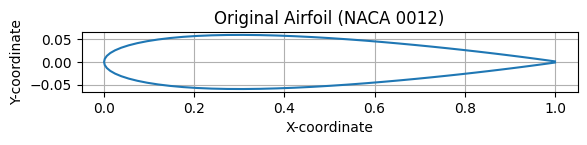

In [19]:
%run 1.Sobol_sequence.ipynb
%run 2.Hicks_Henne_NEW_Final.ipynb

In [2]:
a

0      [0.0084, 0.0104, -0.0033, -0.0033, -0.0086, 0....
1      [-0.0045, -0.0035, 0.0057, 0.0062, 0.0106, -0....
2      [-0.0093, 0.0038, -0.0083, -0.0113, 0.003, -0....
3      [0.0019, -0.0093, 0.0067, 0.0025, -0.0012, 0.0...
4      [0.0045, 0.0017, 0.0026, 0.005, -0.0039, 0.003...
                             ...                        
251    [0.0044, -0.005, -0.0113, -0.0064, 0.0019, -0....
252    [0.0021, 0.0065, -0.0034, -0.0102, 0.0045, -0....
253    [-0.0093, -0.0013, 0.0056, 0.0013, -0.0027, 0....
254    [-0.0044, 0.0003, -0.0089, -0.0052, -0.0072, 0...
255    [0.0083, -0.0068, 0.006, 0.0079, 0.0091, -0.00...
Length: 256, dtype: object

In [5]:
x = pd.read_excel('design_parmeter.xlsx')
x

Unnamed: 0      x1      x2      x3      x4      x5      x6      x7  \
0             0  0.0084  0.0104 -0.0033 -0.0033 -0.0086  0.0015 -0.0019   
1             1 -0.0045 -0.0035  0.0057  0.0062  0.0106 -0.0060  0.0101   
2             2 -0.0093  0.0038 -0.0083 -0.0113  0.0030 -0.0028 -0.0093   
3             3  0.0019 -0.0093  0.0067  0.0025 -0.0012  0.0077  0.0026   
4             4  0.0045  0.0017  0.0026  0.0050 -0.0039  0.0034 -0.0087   
..          ...     ...     ...     ...     ...     ...     ...     ...   
251         251  0.0044 -0.0050 -0.0113 -0.0064  0.0019 -0.0010  0.0099   
252         252  0.0021  0.0065 -0.0034 -0.0102  0.0045 -0.0120 -0.0044   
253         253 -0.0093 -0.0013  0.0056  0.0013 -0.0027  0.0045  0.0081   
254         254 -0.0044  0.0003 -0.0089 -0.0052 -0.0072  0.0103 -0.0088   
255         255  0.0083 -0.0068  0.0060  0.0079  0.0091 -0.0032  0.0036   

         x8  
0   -0.0027  
1    0.0037  
2    0.0085  
3   -0.0092  
4    0.0105  
..      ...  
251  0.0082  
252 -0.0066  
253  0.0118  
254  0.0000  
255 -0.0056  

[256 rows x 9 columns]

Text(0, 0.5, 'X2')

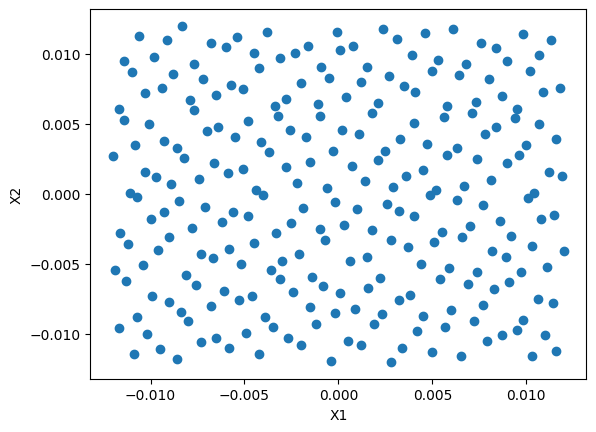

In [11]:
plt.scatter(x['x1'], x['x2'])
plt.title('Original Airfoil (NACA 0012)')
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'X8')

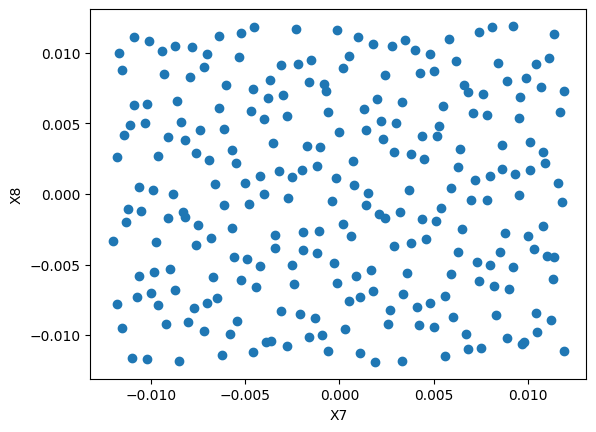

In [19]:
plt.scatter(x['x7'], x['x8'])
plt.xlabel('X7')
plt.ylabel('X8')

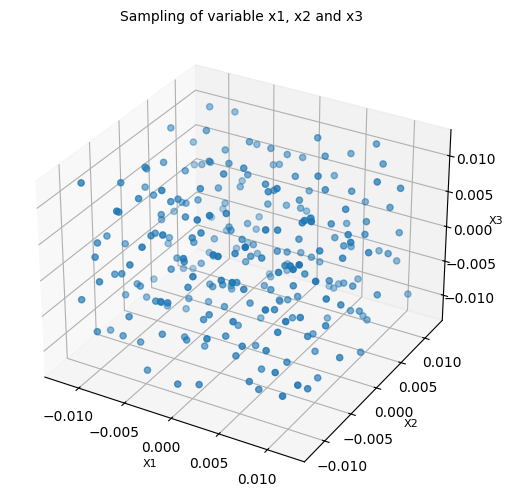

In [76]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x['x1'], x['x2'], x['x3'])

ax.xaxis.labelpad = 2
ax.yaxis.labelpad = 2
ax.zaxis.labelpad = 1

ax.set_title('Sampling of variable x1, x2 and x3', fontsize=10)

ax.set_xlabel('X1',fontsize=8)
ax.set_ylabel('X2',fontsize=8)
ax.set_zlabel('X3',fontsize=8)

plt.show()

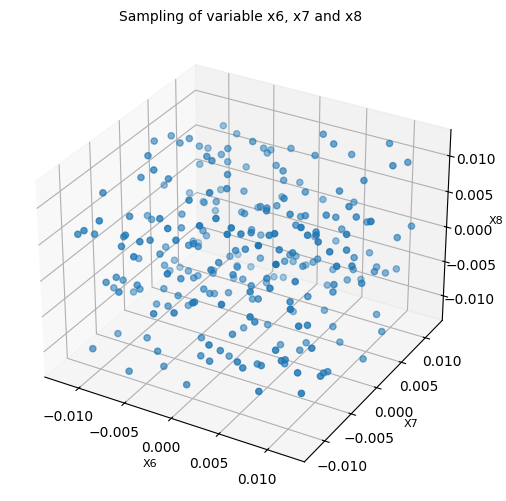

In [78]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x['x6'], x['x7'], x['x8'])

ax.xaxis.labelpad = 2
ax.yaxis.labelpad = 2
ax.zaxis.labelpad = 1

ax.set_title('Sampling of variable x6, x7 and x8', fontsize=10)

ax.set_xlabel('X6',fontsize=8)
ax.set_ylabel('X7',fontsize=8)
ax.set_zlabel('X8',fontsize=8)

plt.show()

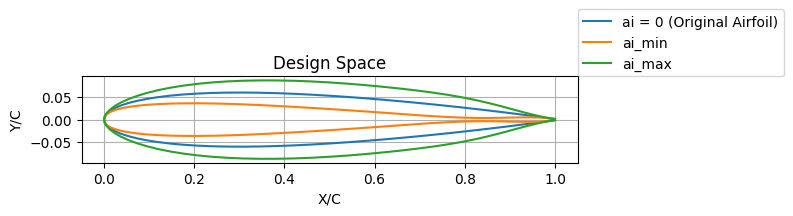

In [12]:
i = 0
a_min = [[-0.012,-0.012,-0.012,-0.012,0.012,0.012,0.012,0.012]]
y_min = hicks_henne_overall(x, y , n, a_min, i, w, xM)
a_max = [[0.012,0.012,0.012,0.012,-0.012,-0.012,-0.012,-0.012]]
y_max = hicks_henne_overall(x, y , n, a_max, i, w, xM)

plt.plot(x, y, label = "ai = 0 (Original Airfoil)")
plt.plot(x, y_min, label = "ai_min")
plt.plot(x, y_max, label = "ai_max")
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Design Space')
plt.xlabel('X/C')
plt.ylabel('Y/C')
plt.legend(loc=(1,1))
plt.grid()

In [23]:
 def deformed_foils_plots(x, y, n, a, w, xM, num_samples, save_path):
    for j in range(16):
        fig, axs = plt.subplots(8, 2, figsize=(10, 12))
        axs = axs.flatten()
        # Plot each dataset
        k = 0
        for i in range(j*16, (j+1)*16):
            y_mod = hicks_henne_overall(x, y , n, a, i, w, xM)
            ax = axs[k]
            # ax.plot(x, y)
            ax.plot(x, y_mod)
            ax.set_title(f'Dataset {i}')
            ax.set_aspect('equal', 'box')
            k = k+1
        plt.tight_layout()  
        file_name = save_path+str(j)
        if save_path:
            plt.savefig(file_name, dpi = 150) 
        plt.show()

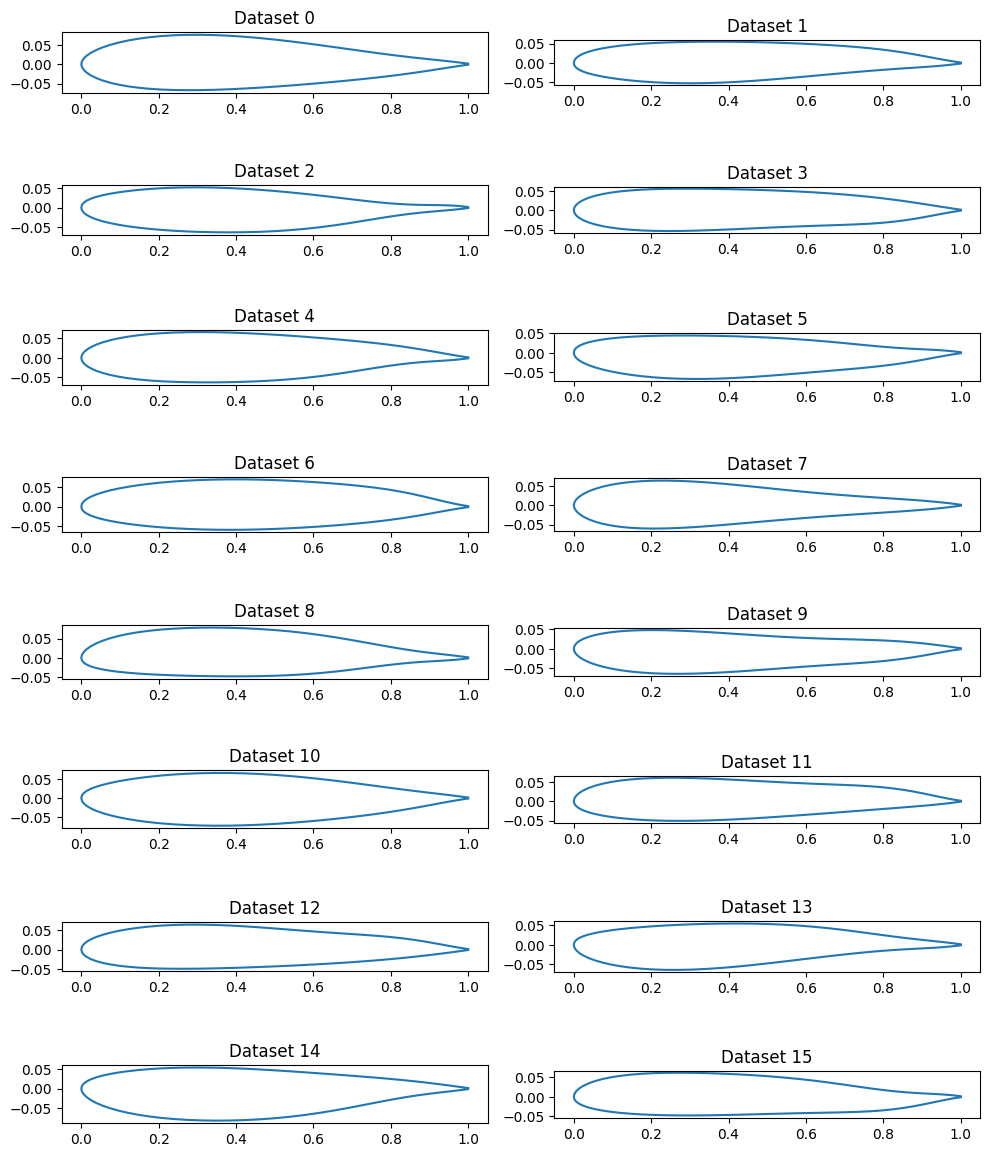

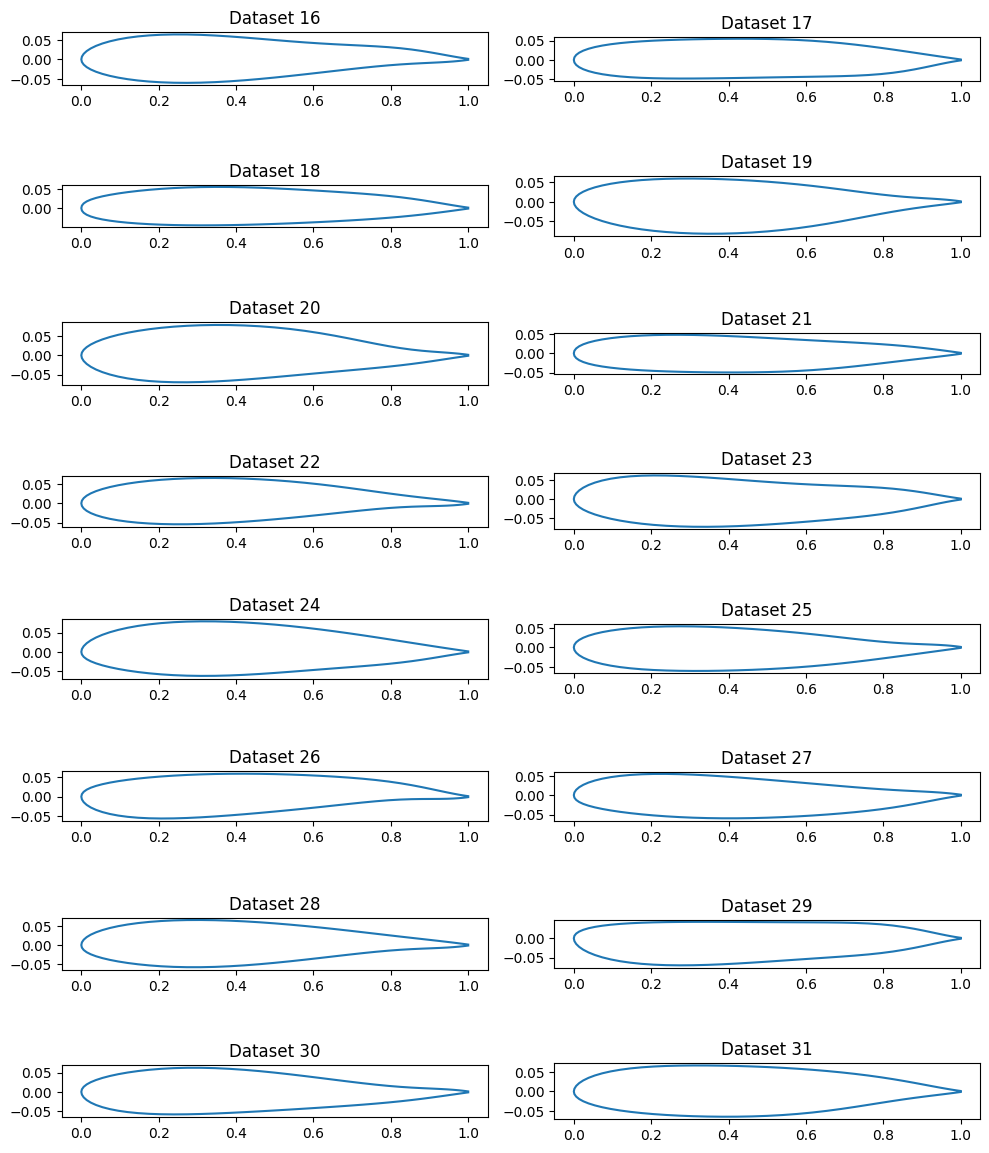

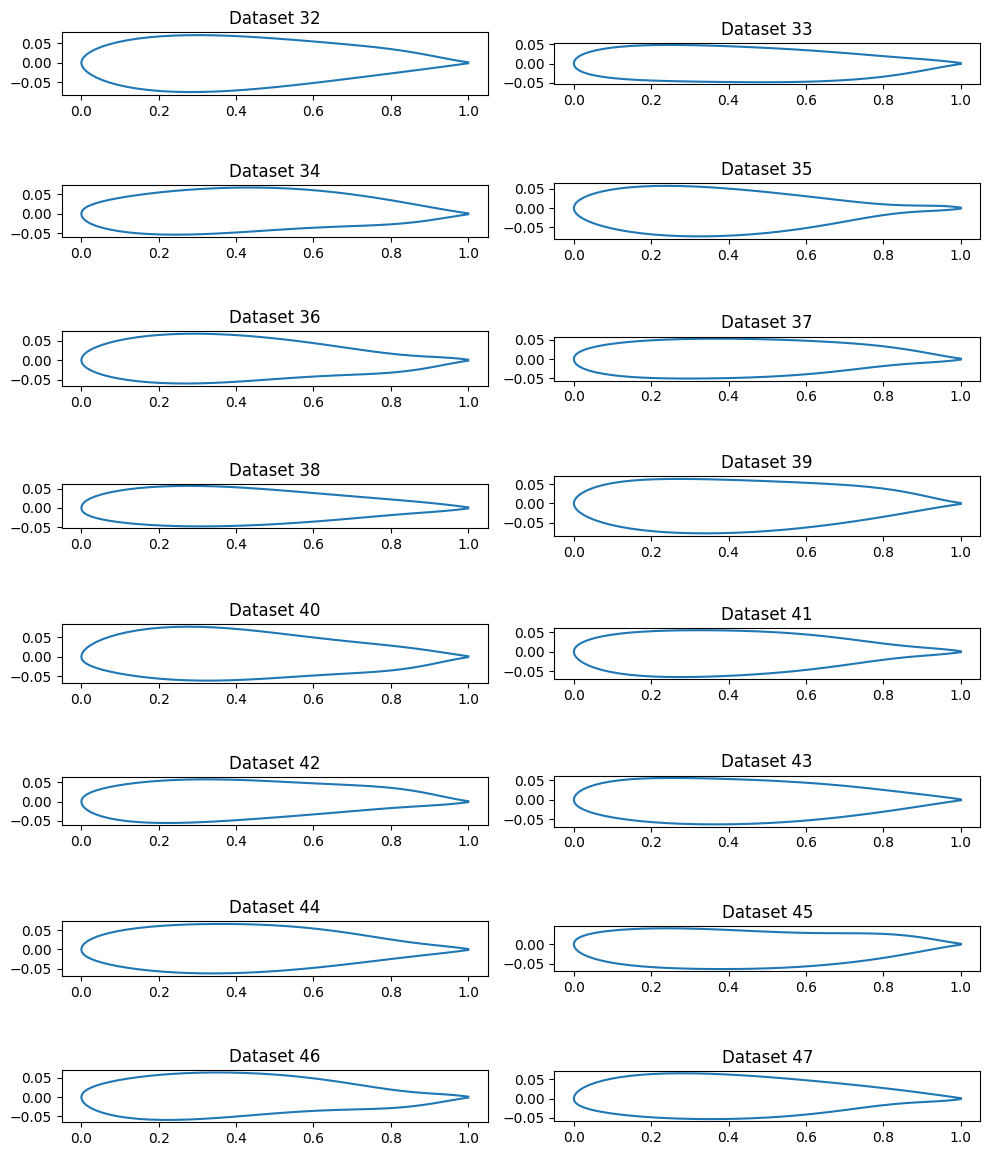

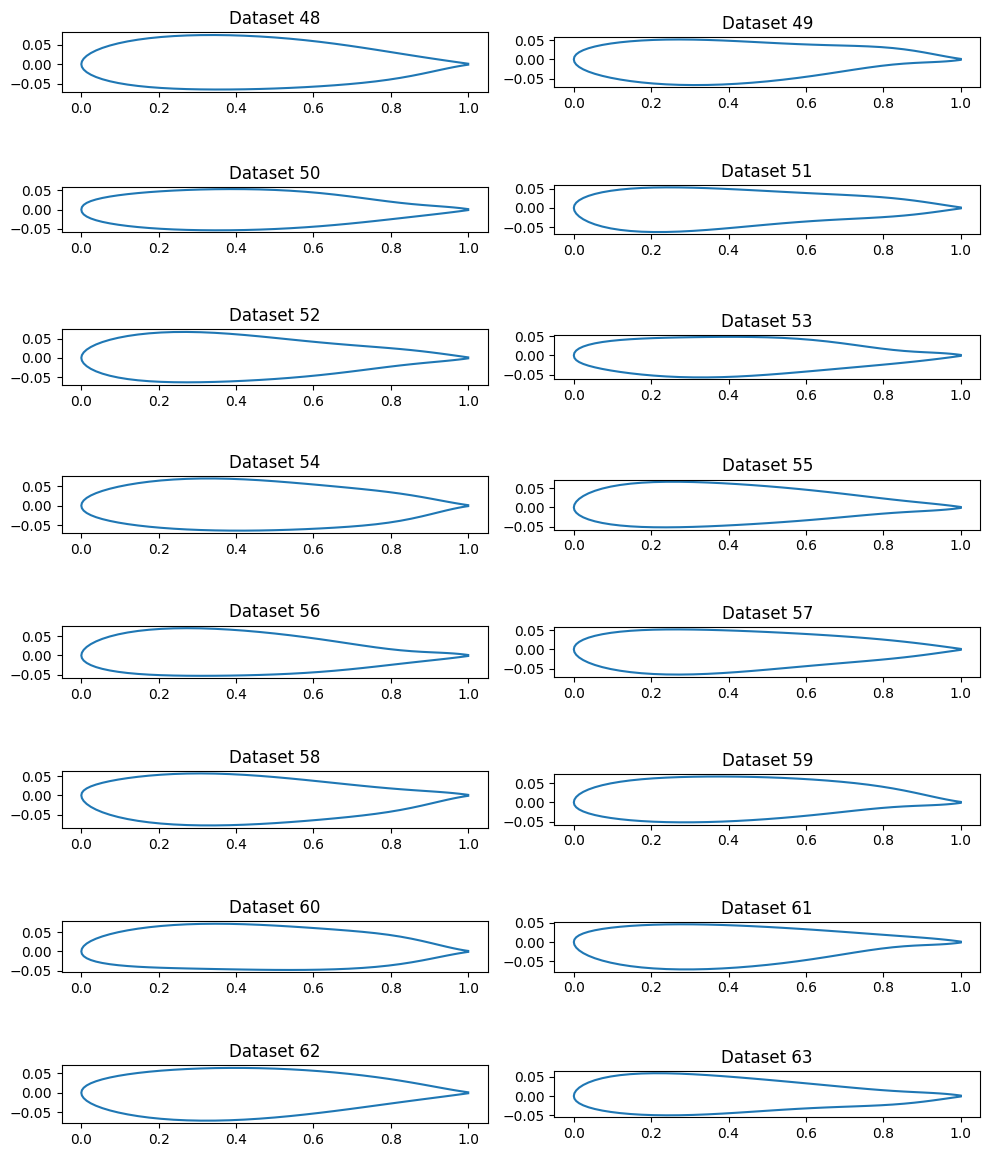

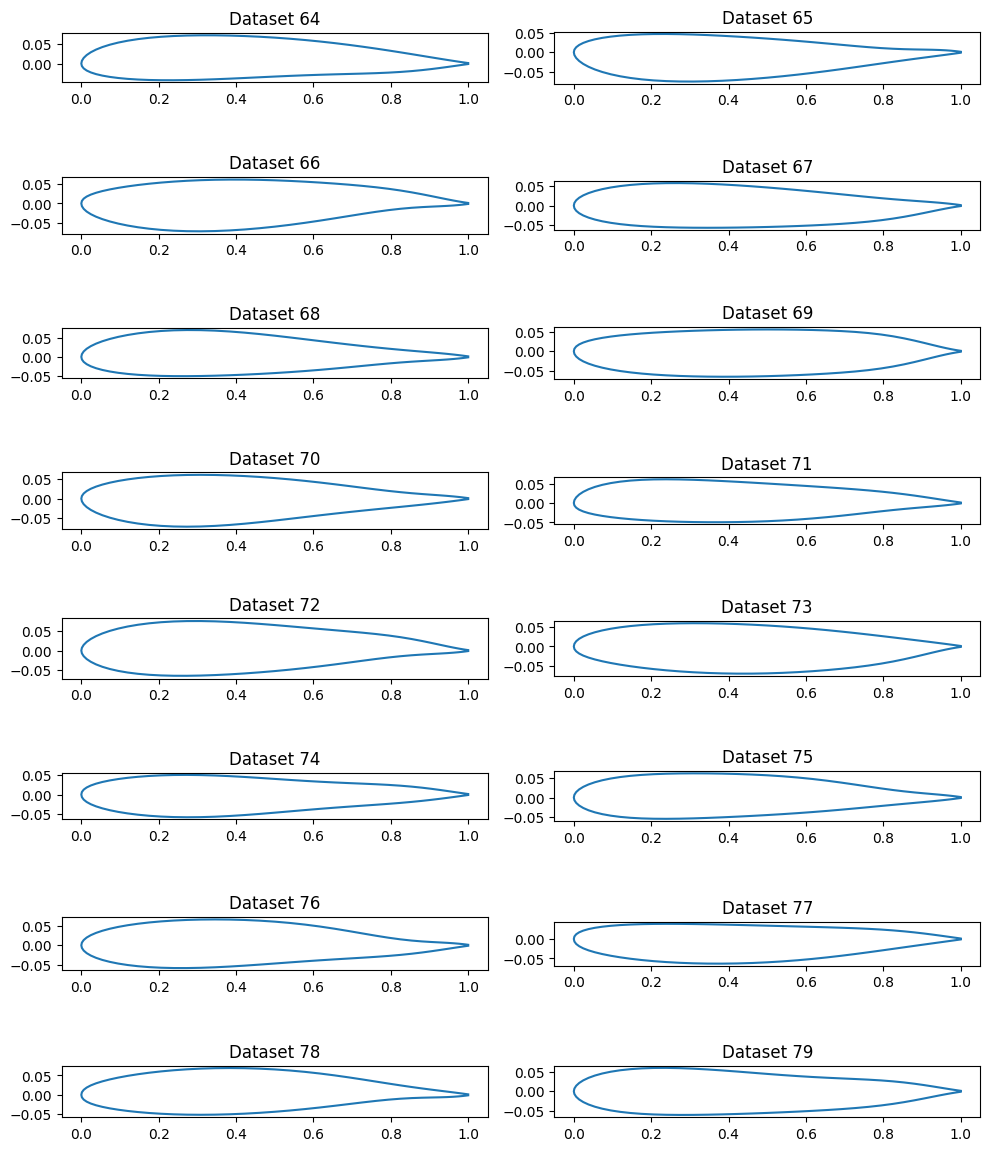

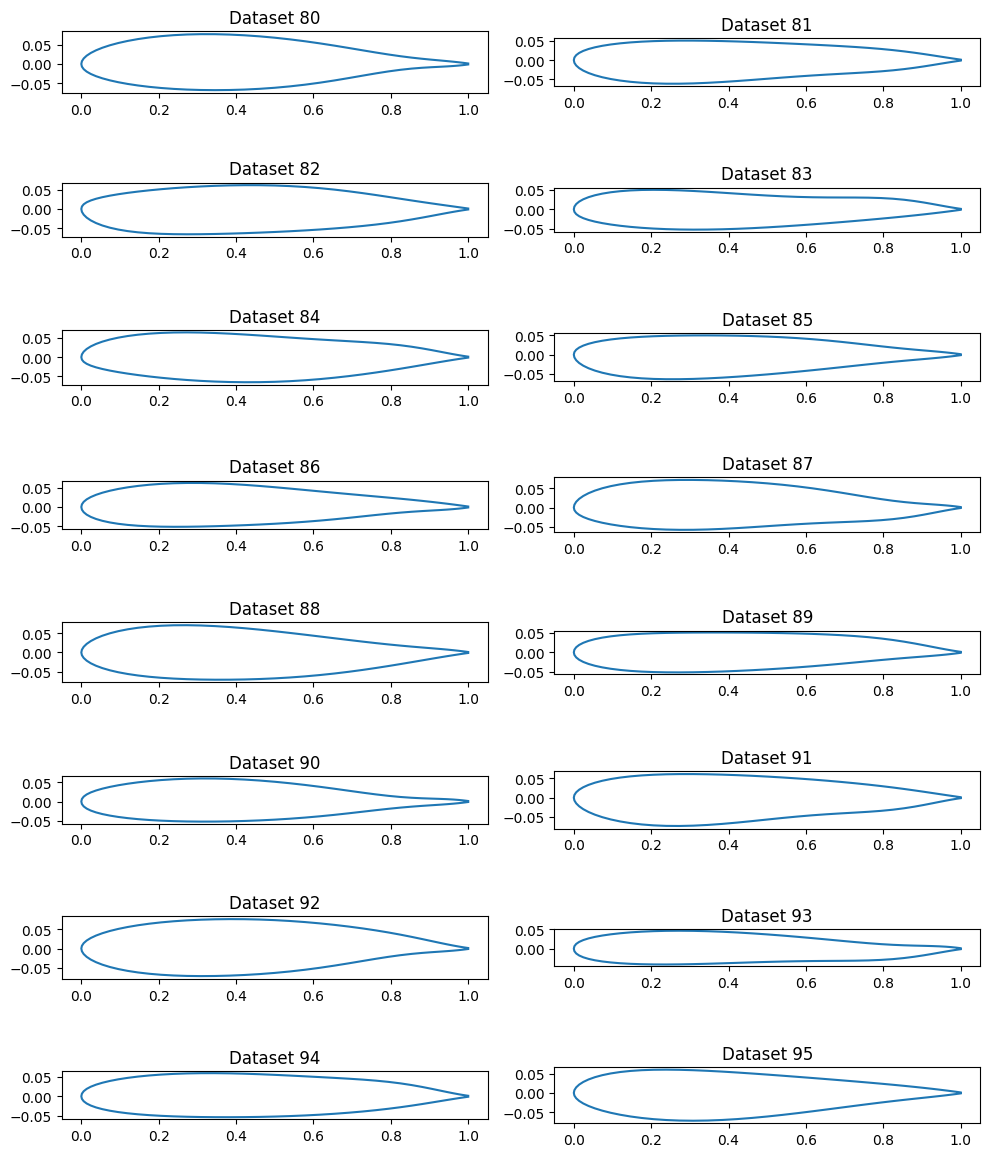

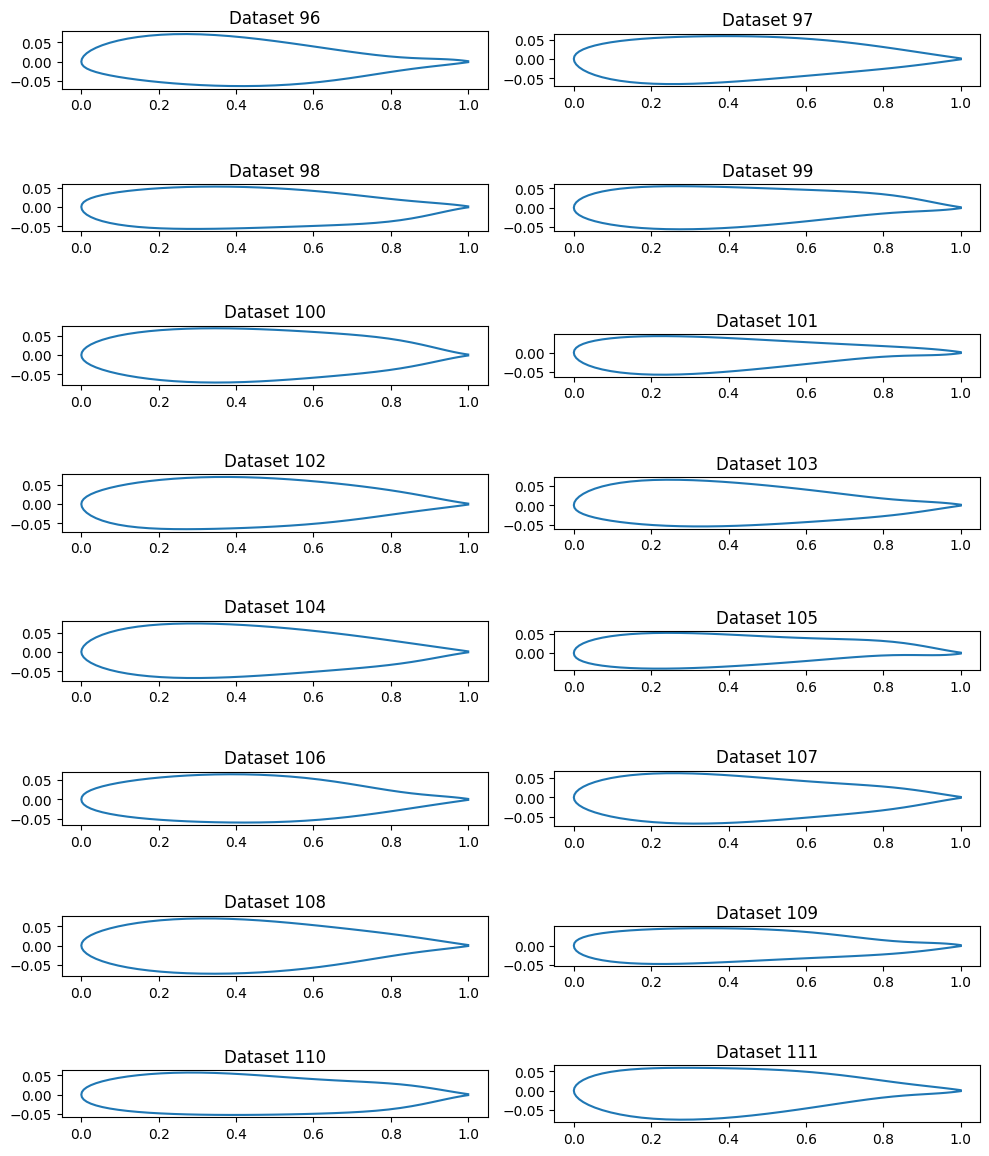

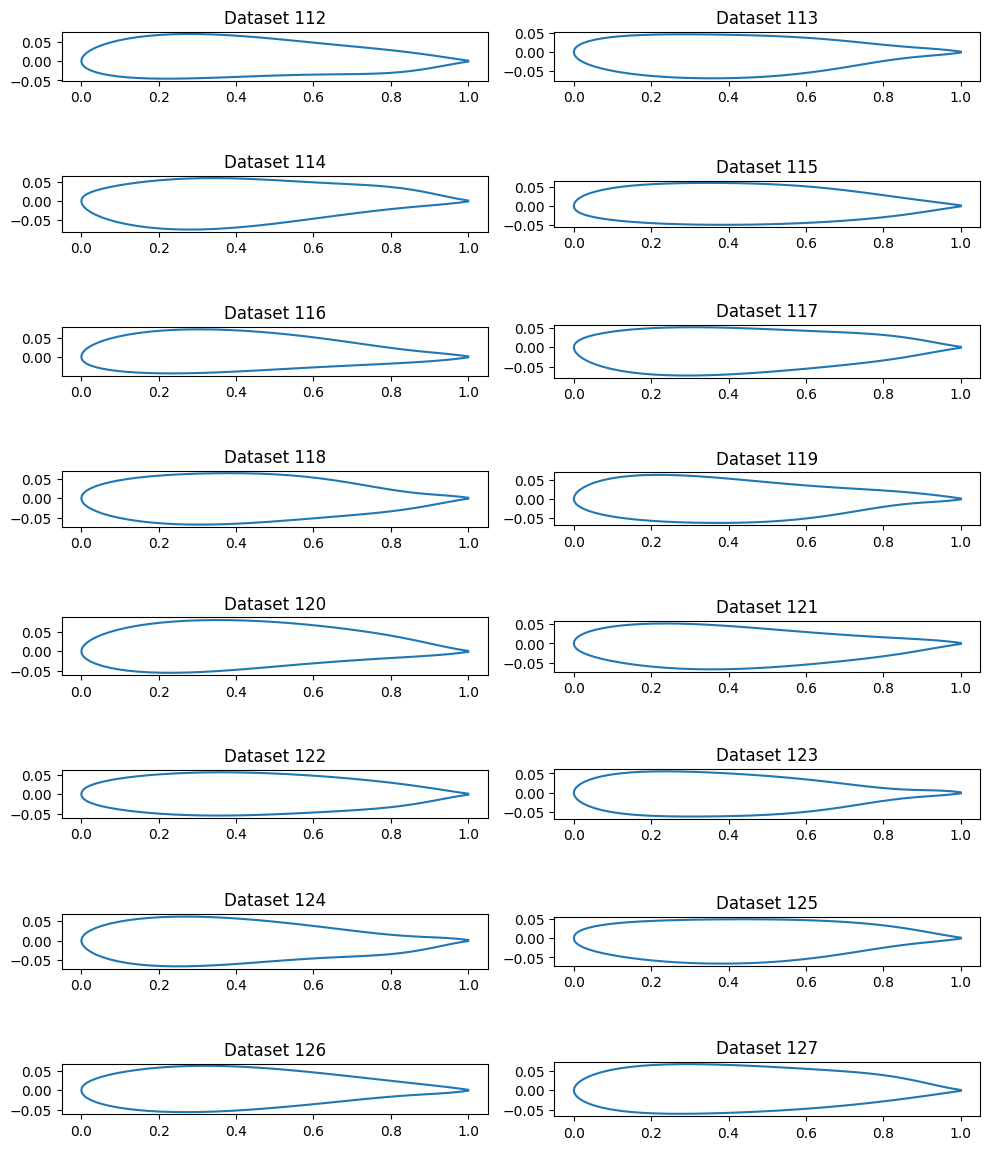

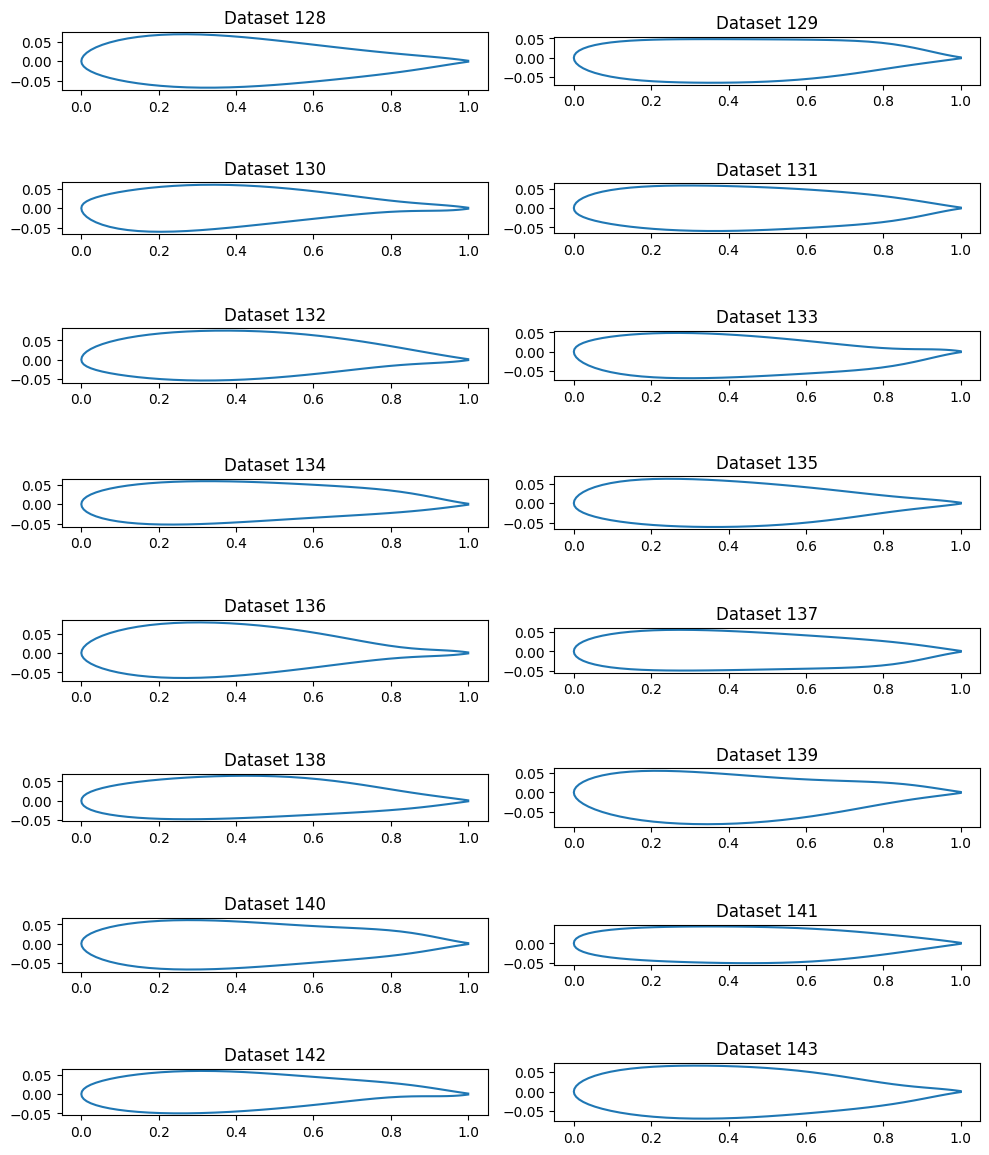

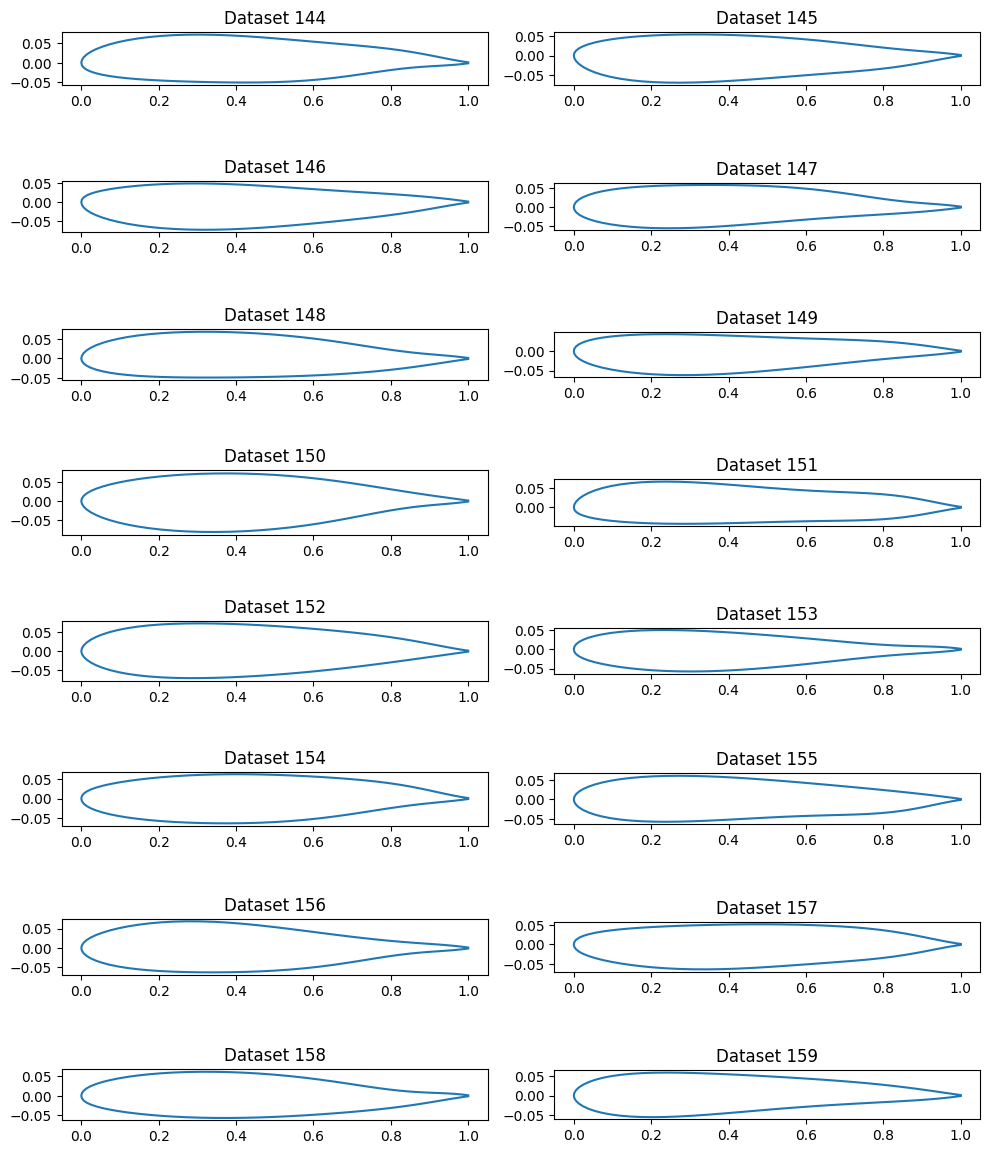

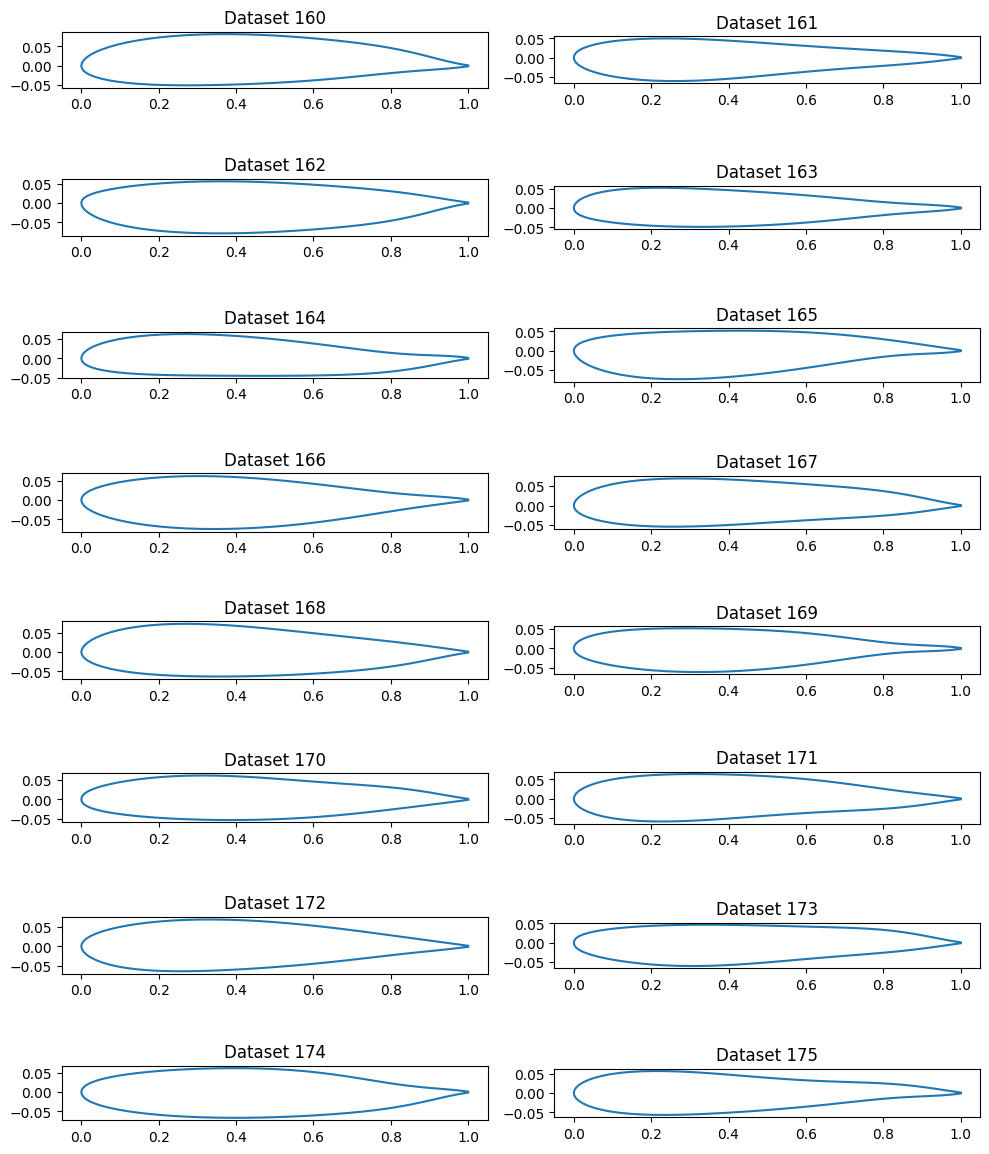

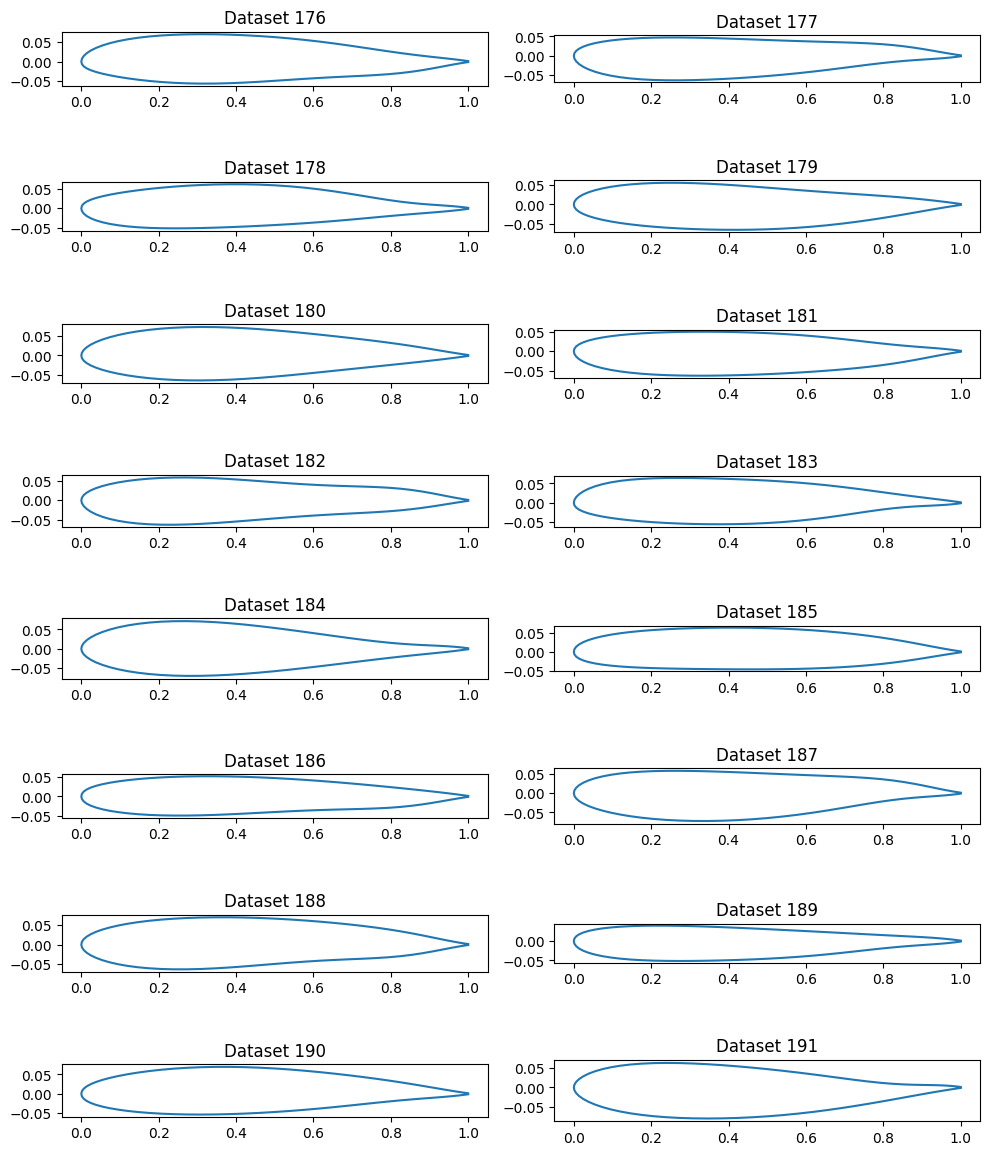

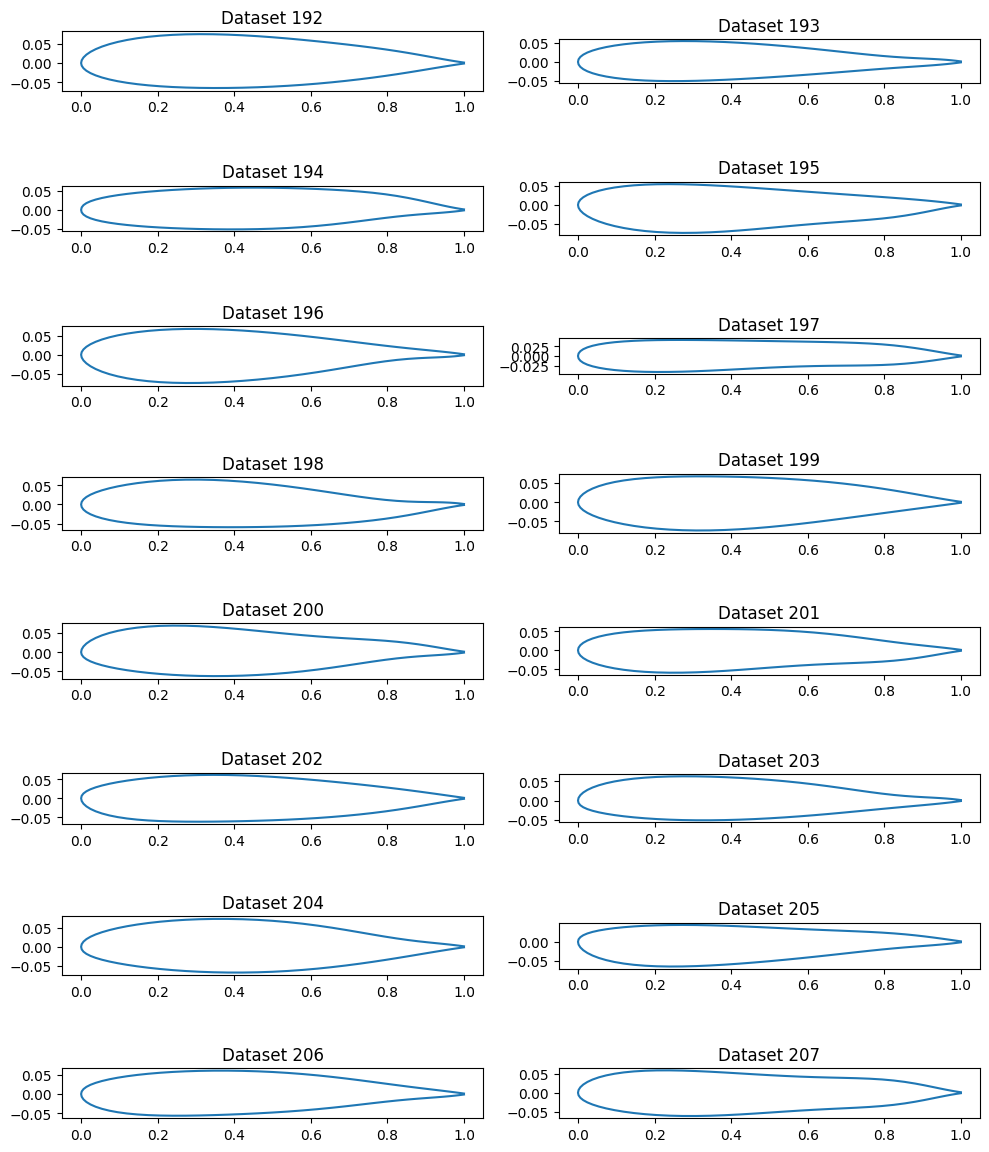

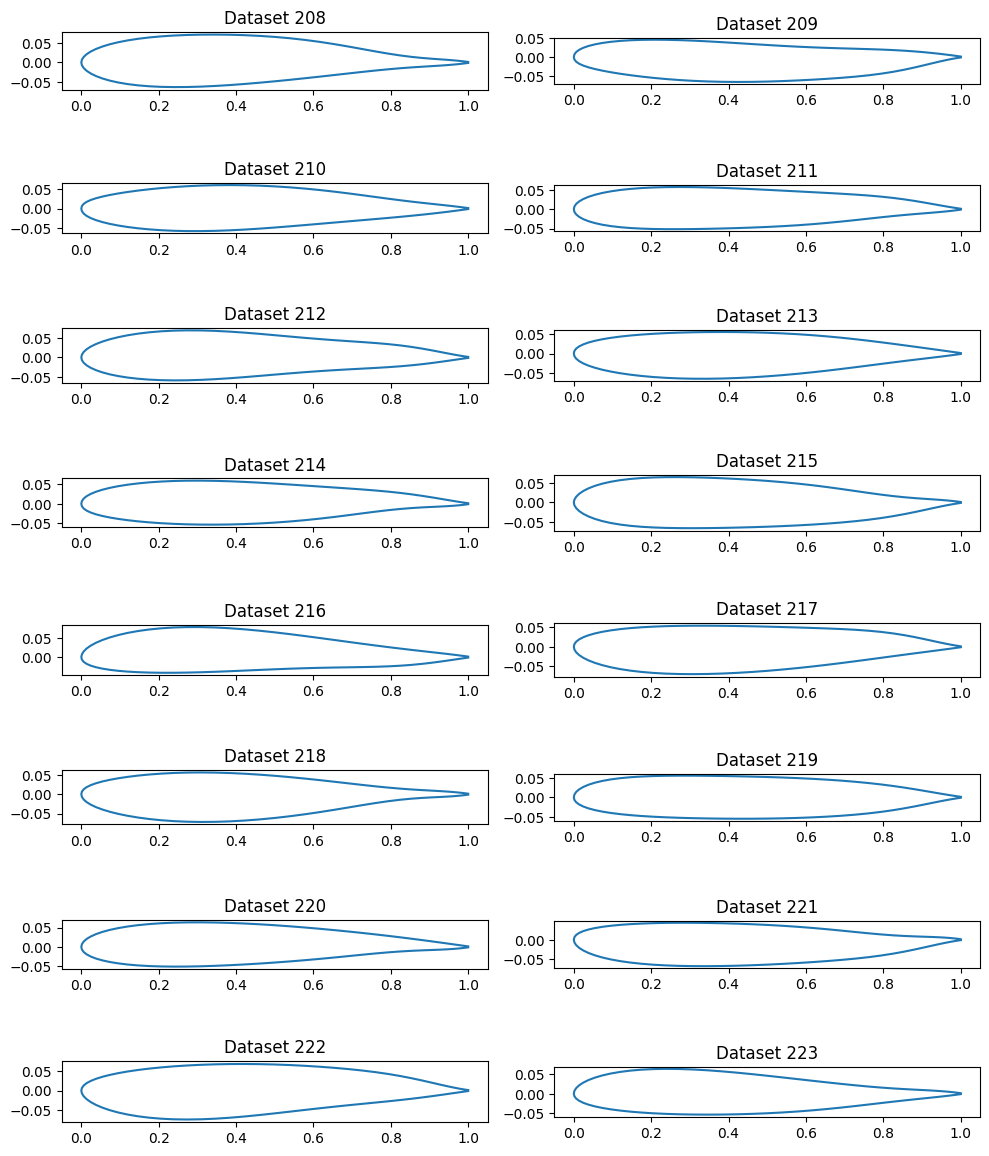

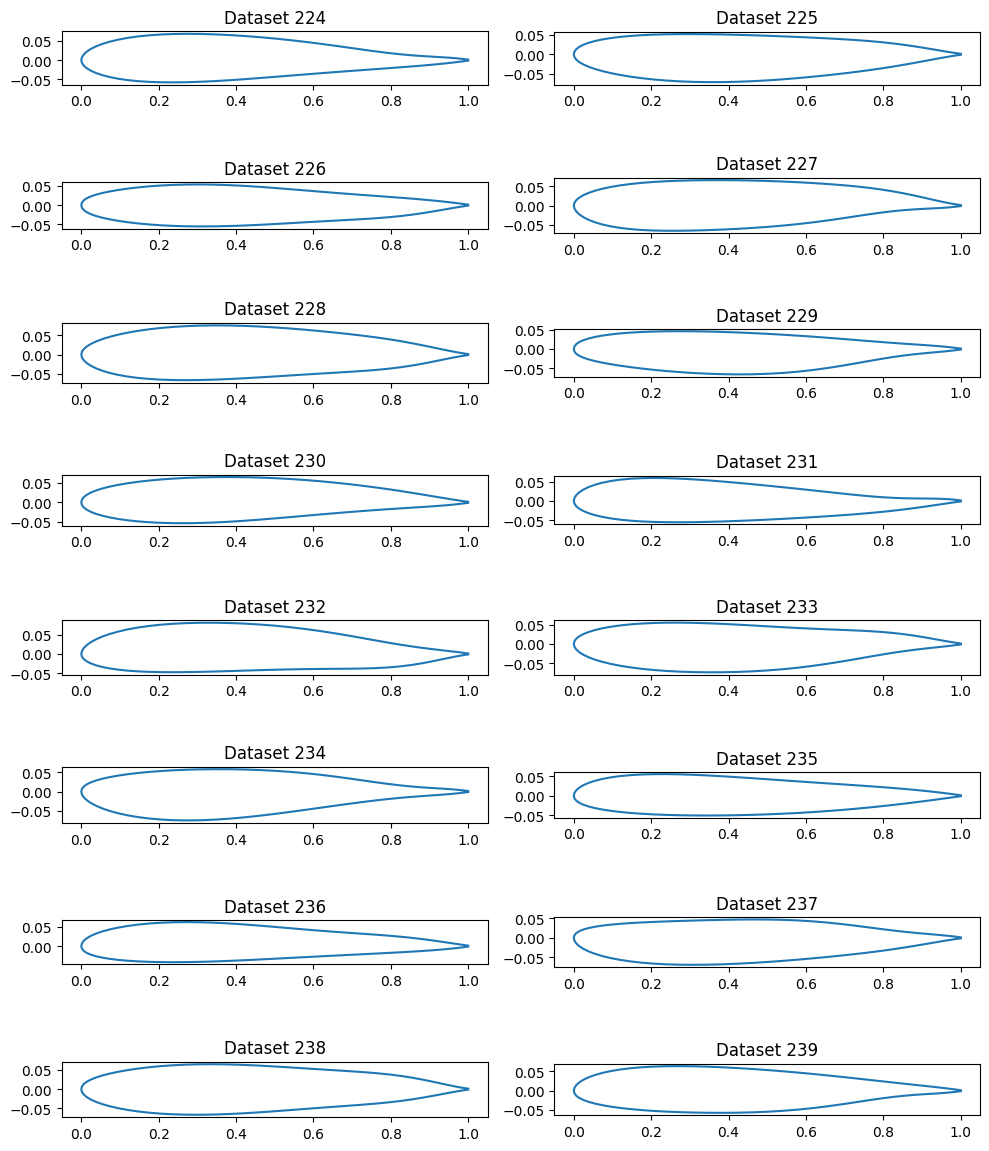

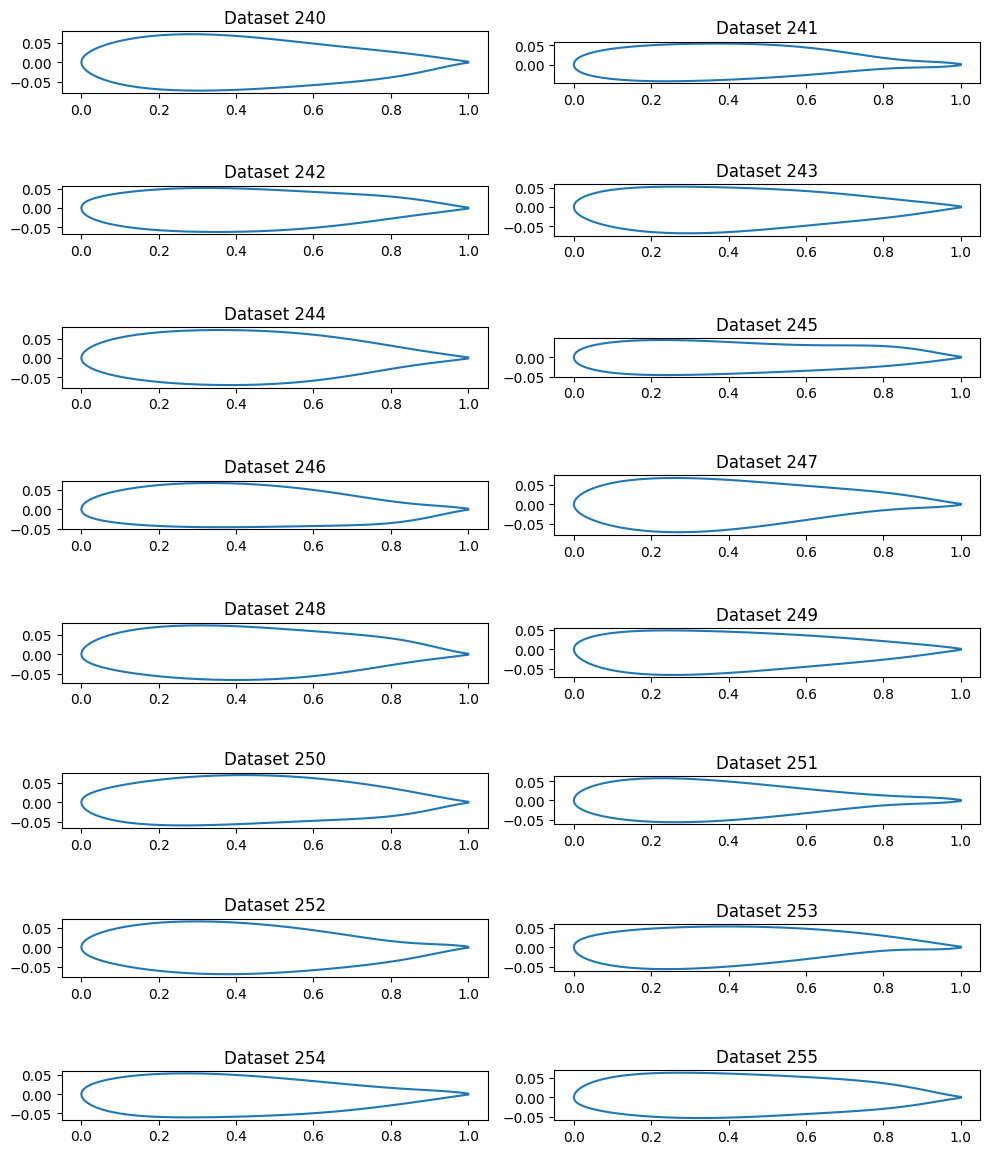

In [24]:
save_path ="Deformed_foils"
deformed_foils_plots(x, y, n, a, w, xM, num_samples, save_path)

In [1]:
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
x1 = pd.read_excel('design_parmeter.xlsx')
y1 = pd.read_excel('Cl_Cd.xlsx')

In [3]:
df = pd.merge(x1, y1)
df = df.dropna()
df

Unnamed: 0      x1      x2      x3      x4      x5      x6      x7  \
0             0  0.0084  0.0104 -0.0033 -0.0033 -0.0086  0.0015 -0.0019   
1             1 -0.0045 -0.0035  0.0057  0.0062  0.0106 -0.0060  0.0101   
2             2 -0.0093  0.0038 -0.0083 -0.0113  0.0030 -0.0028 -0.0093   
3             3  0.0019 -0.0093  0.0067  0.0025 -0.0012  0.0077  0.0026   
4             4  0.0045  0.0017  0.0026  0.0050 -0.0039  0.0034 -0.0087   
..          ...     ...     ...     ...     ...     ...     ...     ...   
251         251  0.0044 -0.0050 -0.0113 -0.0064  0.0019 -0.0010  0.0099   
252         252  0.0021  0.0065 -0.0034 -0.0102  0.0045 -0.0120 -0.0044   
253         253 -0.0093 -0.0013  0.0056  0.0013 -0.0027  0.0045  0.0081   
254         254 -0.0044  0.0003 -0.0089 -0.0052 -0.0072  0.0103 -0.0088   
255         255  0.0083 -0.0068  0.0060  0.0079  0.0091 -0.0032  0.0036   

         x8      CL       CD  
0   -0.0027  0.5294  0.00733  
1    0.0037  0.6747  0.00947  
2    0.0085  0.4693  0.00959  
3   -0.0092  0.5034  0.00928  
4    0.0105  0.6249  0.00916  
..      ...     ...      ...  
251  0.0082  0.5649  0.00824  
252 -0.0066  0.4281  0.00764  
253  0.0118  0.6392  0.01037  
254  0.0000  0.4434  0.00834  
255 -0.0056  0.6020  0.00918  

[242 rows x 11 columns]

In [4]:
df.to_excel('Dataset.xlsx')